# Meaningful Question 2: 
## For the homes where we have data on the last year renovated, does year renovated have a similar impact as age?

## Imports

In [1]:
import pandas as pd
import numpy as np
from helpers import *
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

df = pd.read_csv("kc_house_data.csv")

## Data Cleaning

In [2]:
# Creating a new dataframe with only these four columns
yr_df = df.filter(["date", "price", "yr_built", "yr_renovated"])

In [3]:
# Filling null values with 0
yr_df["yr_renovated"] = yr_df["yr_renovated"].fillna(0)

In [4]:
# Changing years in the Year Renovated column to integers
yr_df["yr_renovated"] = yr_df["yr_renovated"].apply(lambda x: to_int(x))

In [5]:
# Changing dates in the Date column into datetime objects
yr_df['date'] = pd.to_datetime(yr_df['date'])

In [6]:
# New column for the year a home was sold, derived from the Date column
yr_df['yr_sold'] = pd.DatetimeIndex(yr_df['date']).year

In [7]:
# New column for age of homes
yr_df['home_age'] = yr_df["yr_sold"] - yr_df["yr_built"]

#### Creating a dataframe with all homes that have information on when they were renovated

In [8]:
with_reno_df = yr_df.where(yr_df["yr_renovated"] > 0).dropna()

In [9]:
# Creating a new column just for this 'with renovations' dataframe, 
# showing the number of years since the home was renovated
with_reno_df['since_reno'] = with_reno_df["yr_sold"] - yr_df["yr_renovated"]

In [10]:
# Excluding those renovated since they were sold
with_reno_df = with_reno_df.where(with_reno_df["since_reno"] > 0)

#### Creating a dataframe with all homes that do not have information on when they were renovated

In [11]:
without_reno_df = yr_df.where(yr_df["yr_renovated"] == 0).dropna()

In [12]:
# Excluding those built after they were sold
without_reno_df = without_reno_df.where(without_reno_df["home_age"] > 0)

## Data Overview

In [13]:
# Assigning variables to the Home Age column from the dataframe with homes that
# do not have information on when they were renovated, and to the Years Since
# Renovation column from the dataframe with renovated homes
age_col = without_reno_df["home_age"]
since_reno_col = with_reno_df["since_reno"]

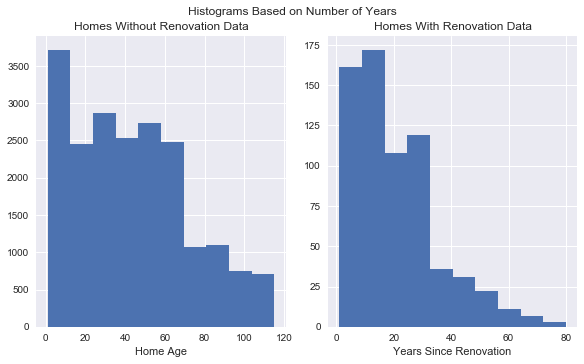

In [31]:
# Creating a histogram to show the frequency of homes at various ages for homes
# without renovation data, and a histogram to show the frequency of homes
# with some number of years since their renovation if they have renovation data
f1_1, axes = plt.subplots(1, 2, figsize=(8,5), constrained_layout=True)

ax1_0 = age_col.hist(ax=axes[0])
ax1_1 = since_reno_col.hist(ax=axes[1])

ax1_0.title.set_text("Homes Without Renovation Data")
ax1_1.title.set_text("Homes With Renovation Data")

ax1_0.set_xlabel("Home Age")
ax1_1.set_xlabel("Years Since Renovation")

f1_1.suptitle("Histograms Based on Number of Years")
plt.show()

In [15]:
# Creating variables to log the number of years (either home age or years since
# renovation) in order to make the data more normally distributed
age_log = np.log(age_col)
since_reno_log = np.log(since_reno_col)

In [32]:
# Creating new columns in the appropriate dataframes for the log data
without_reno_df["home_age_log"] = age_log
with_reno_df["since_reno_log"] = since_reno_log

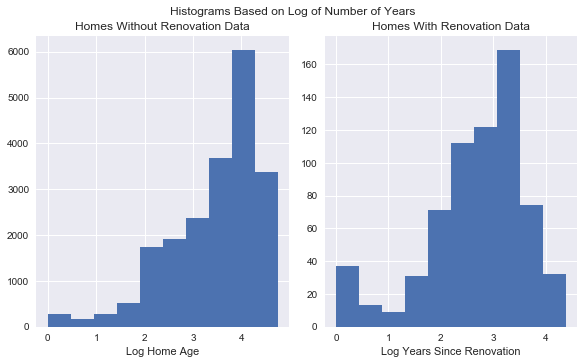

In [39]:
# Creating histograms to show the more normal distributions for the log data
f1_2, axes = plt.subplots(1, 2, figsize=(8,5), constrained_layout=True)

ax1_2_0 = age_log.hist(ax=axes[0])
ax1_2_1 = since_reno_log.hist(ax=axes[1])

ax1_2_0.title.set_text("Homes Without Renovation Data")
ax1_2_1.title.set_text("Homes With Renovation Data")

ax1_2_0.set_xlabel("Log Home Age")
ax1_2_1.set_xlabel("Log Years Since Renovation")

f1_2.suptitle("Histograms Based on Log of Number of Years")

plt.show()

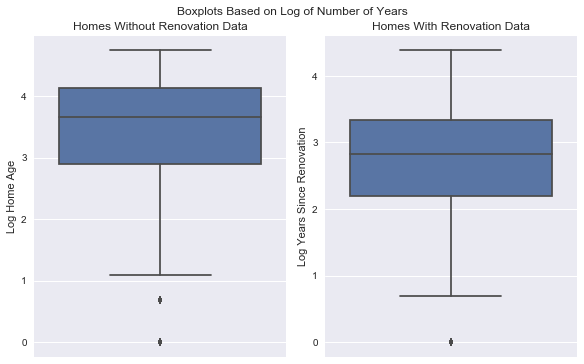

In [48]:
# Creating boxplots for the log data
f2, axes = plt.subplots(1, 2, figsize=(8,5), constrained_layout=True)

ax2_0 = sns.boxplot(age_log, orient='v', ax=axes[0])
ax2_1 = sns.boxplot(since_reno_log, orient='v', ax=axes[1])

ax2_0.title.set_text("Homes Without Renovation Data")
ax2_1.title.set_text("Homes With Renovation Data")

ax2_0.set_ylabel("Log Home Age")
ax2_1.set_ylabel("Log Years Since Renovation")

f2.suptitle("Boxplots Based on Log of Number of Years")

plt.show()

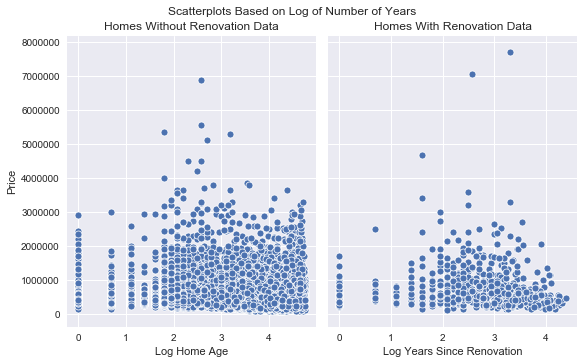

In [51]:
f3, axes = plt.subplots(1, 2, figsize=(8,5), sharey=True, constrained_layout=True)

ax3_0 = sns.scatterplot(x="home_age_log", y="price", data=without_reno_df, ax=axes[0])
ax3_1 = sns.scatterplot(x="since_reno_log", y="price", data=with_reno_df, ax=axes[1])

ax3_0.title.set_text("Homes Without Renovation Data")
ax3_1.title.set_text("Homes With Renovation Data")

ax3_0.set_xlabel("Log Home Age")
ax3_1.set_xlabel("Log Years Since Renovation")

ax3_0.set_ylabel("Price")

f3.suptitle("Scatterplots Based on Log of Number of Years")

plt.show()

## Modeling

In [44]:
# Summary of the ordinary least squares reqression comparing price with the log 
# age of homes that do not have renovation data
model_without_reno = ols(formula=('price~home_age_log'), data=without_reno_df).fit()
model_without_reno.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     268.3
Date:                Tue, 07 May 2019   Prob (F-statistic):           6.48e-60
Time:                        09:49:17   Log-Likelihood:            -2.8943e+05
No. Observations:               20411   AIC:                         5.789e+05
Df Residuals:                   20409   BIC:                         5.789e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.731e+05   9136.478     73.669      0.000    6.55e+05    6.91e+05
home_age_log -4.196e+04   2561.531    -16.379      0.000    -4.7e+04   -3.69e+04
==============================================================================
Omnibus:                    16826.926   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           688120.330
Skew:                           3.724   Prob(JB):                         0.00
Kurtosis:                      30.453   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Summary of the ordinary least squares reqression comparing price with the log 
# number of years since a home has been renovated for homes with renovation data
model_with_reno = ols(formula=('price~since_reno_log'), data=with_reno_df).fit()
model_with_reno.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.148
Date:                Tue, 07 May 2019   Prob (F-statistic):             0.0421
Time:                        09:56:36   Log-Likelihood:                -9918.1
No. Observations:                 670   AIC:                         1.984e+04
Df Residuals:                     668   BIC:                         1.985e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       9.179e+05   7.25e+04     12.666      0.000    7.76e+05    1.06e+06
since_reno_log  -5.21e+04   2.56e+04     -2.037      0.042   -1.02e+05   -1871.331
==============================================================================
Omnibus:                      664.262   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35581.815
Skew:                           4.420   Prob(JB):                         0.00
Kurtosis:                      37.589   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The answer is yes, but it's an unsatisfying yes. The year a home was built is a terrible predictor for the price of a home, as is the year a home was renovated. They are both bad predictors!

## Summary

Unfortunately, there is a chance that the number of years since a home was renovated is statistically insignificant, as shown by the P-Value of .042 (which is close to the popular .05 threshold for significance). We learned that there is little impact on price based on when a home was renovated and it does not act exactly the same as home age.